<h3>Ejercicio 1</h3>
<p>En este ejercicio estudiamos&nbsp; la familia de aut&oacute;matas celulares de dimensi&oacute;n uno formada por los aut&oacute;matas que actualizan una celda usando el estado de dos celdas vecinas por cada lado (aut&oacute;matas-5). Despu&eacute;s de modificar las funciones de los aut&oacute;matas que s&oacute;lo tienen en cuenta una celda vecina por cada lado (aut&oacute;matas-3) hay que demostrar que todos los aut&oacute;matas-3 est&aacute;n incluidos en el conjunto de aut&oacute;matas-5.</p>
<h4>Apartado 1</h4>

In [1]:
def vecinos(j,L):
    return tuple([L[(j-2)%len(L)],L[(j-1)%len(L)],L[j],L[(j+1)%len(L)],L[(j+2)%len(L)]])

<h4>Apartado 2</h4>

In [2]:
def listas(K):
    L = []
    for p in srange(2^K):
       L.append(tuple(p.digits(base=2,padto=K)))
    return L

<h4>Apartado 4</h4>

In [3]:
def diccionario(c,k):
    C = zip(listas(c),(k).digits(base=2,padto=2**c))
    return dict(C)

<h4>Apartado 5</h4>

In [4]:
def siguiente(L,k):
    LL = []
    n = len(L)
    dic = diccionario(5,k)
    for j in srange(n):
        V = vecinos(j,L)
        LL.append(dic[V])
    return LL

<h4>Apartado 6</h4>

In [5]:
def evolucion(L,k,N):
    LL = [L]
    for int in srange(N):
        LL.append(siguiente(LL[-1:][0],k))
    return LL

<h4>Apartado 7</h4>

<p>&nbsp; Para demostrar que todos los aut&oacute;matas-3 est&aacute;n incluidos en el conjunto de aut&oacute;matas-5, observamos que para cada clave del diccionario de un aut&oacute;mata-3 hay 4 claves del diccionario de un aut&oacute;mata-5 ($8\times 4=32$), y la forma de conseguir que unoo de&nbsp; aut&oacute;matas-5 tenga el mismo comportamiento que uno dado de aut&oacute;matas-3 es asignar a cada clave de $5$ el mismo valor que el diccionario de $3$ asigna a sus tres posiciones centrales. Se consigue as&iacute; que el diccionario de $3$ tenga exactamente la misma informaci&oacute;n que el de $5$, y debemos esperar que tenga el mismo comportamiento.</p>

In [6]:
def traductor(k):
        dicc = {}
        DD3 = diccionario(3,k)
        L5 = listas(5)
        for item in listas(5):
            L3 = item[1:4]
            dicc[item] = DD3[L3]
        return dicc

In [7]:
traductor(18)

{(0, 0, 0, 0, 0): 0,
 (0, 0, 0, 0, 1): 0,
 (0, 0, 0, 1, 0): 1,
 (0, 0, 0, 1, 1): 1,
 (0, 0, 1, 0, 0): 0,
 (0, 0, 1, 0, 1): 0,
 (0, 0, 1, 1, 0): 0,
 (0, 0, 1, 1, 1): 0,
 (0, 1, 0, 0, 0): 1,
 (0, 1, 0, 0, 1): 1,
 (0, 1, 0, 1, 0): 0,
 (0, 1, 0, 1, 1): 0,
 (0, 1, 1, 0, 0): 0,
 (0, 1, 1, 0, 1): 0,
 (0, 1, 1, 1, 0): 0,
 (0, 1, 1, 1, 1): 0,
 (1, 0, 0, 0, 0): 0,
 (1, 0, 0, 0, 1): 0,
 (1, 0, 0, 1, 0): 1,
 (1, 0, 0, 1, 1): 1,
 (1, 0, 1, 0, 0): 0,
 (1, 0, 1, 0, 1): 0,
 (1, 0, 1, 1, 0): 0,
 (1, 0, 1, 1, 1): 0,
 (1, 1, 0, 0, 0): 1,
 (1, 1, 0, 0, 1): 1,
 (1, 1, 0, 1, 0): 0,
 (1, 1, 0, 1, 1): 0,
 (1, 1, 1, 0, 0): 0,
 (1, 1, 1, 0, 1): 0,
 (1, 1, 1, 1, 0): 0,
 (1, 1, 1, 1, 1): 0}

In [8]:
def siguiente2(L,k):
    LL = []
    n = len(L)
    dic = traductor(k)
    for j in srange(n):
        V = vecinos(j,L)
        LL.append(dic[V])
    return LL

In [9]:
def evolucion2(L,k,N):
    LL = [L]
    for int in srange(N):
        LL.append(siguiente2(LL[-1:][0],k))
    return LL

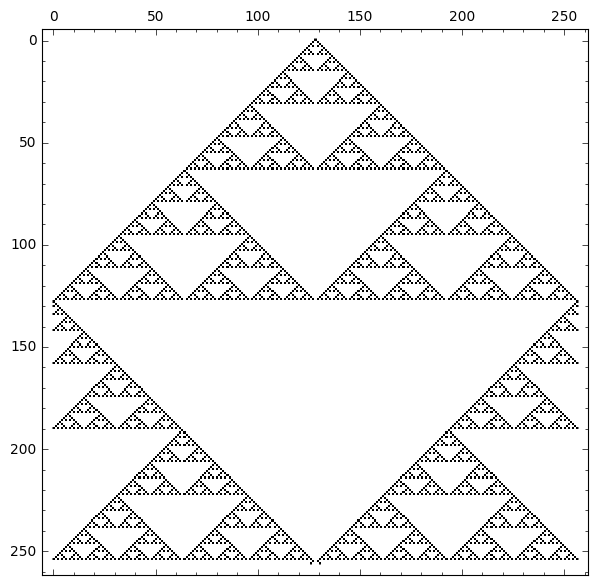

In [10]:
matrix_plot(matrix(ZZ,evolucion2([0]*128+[1]+[0]*128,18,256)))

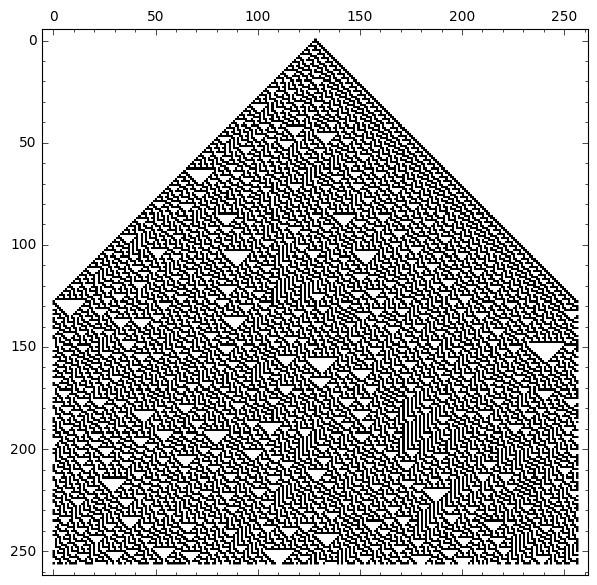

In [11]:
matrix_plot(matrix(ZZ,evolucion2([0]*128+[1]+[0]*128,30,256)))

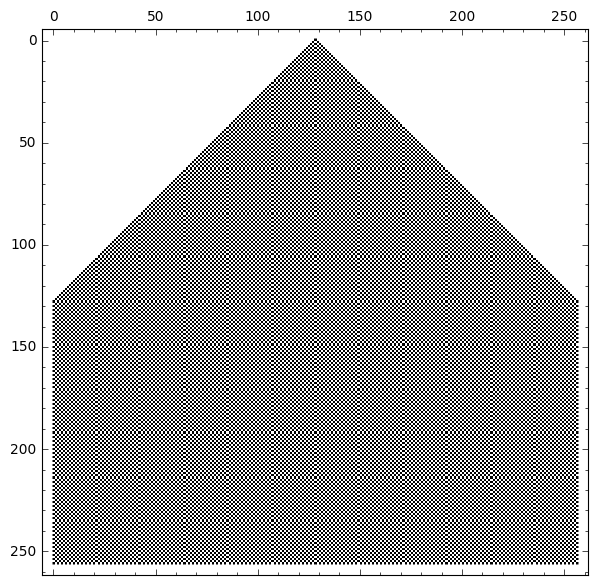

In [12]:
matrix_plot(matrix(ZZ,evolucion2([0]*128+[1]+[0]*128,50,256)))

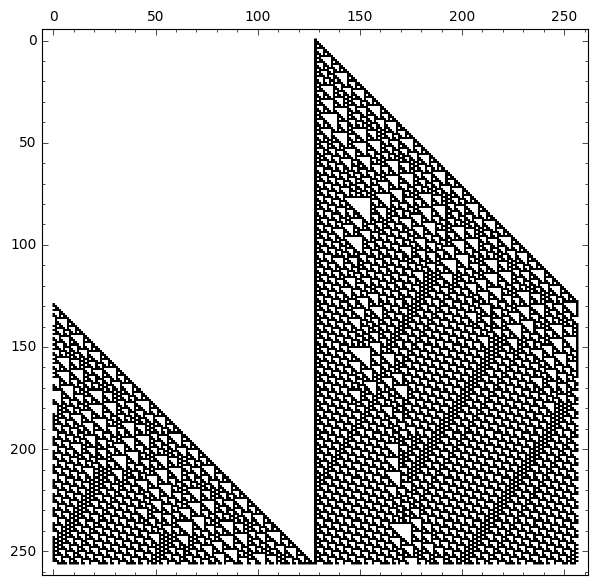

In [13]:
matrix_plot(matrix(ZZ,evolucion2([0]*128+[1]+[0]*128,110,256)))

<p>Estos cuatro gr&aacute;ficos comprueban que podemos obtener los aut&oacute;matas de $3$ con $k=18,30,50,110$ usando automatas de $5$, es decir usando $traductor$ y $evolucion2$. El siguiente es un aut&oacute;mata de $5$ obtenido con un $k$ aleatorio, de forma que cada vez que lo ejecutamos produce un resultado distinto. Algunos no tienen mucho inter&eacute;s, pero de vez en cuando aparecen resultados curiosos.</p>

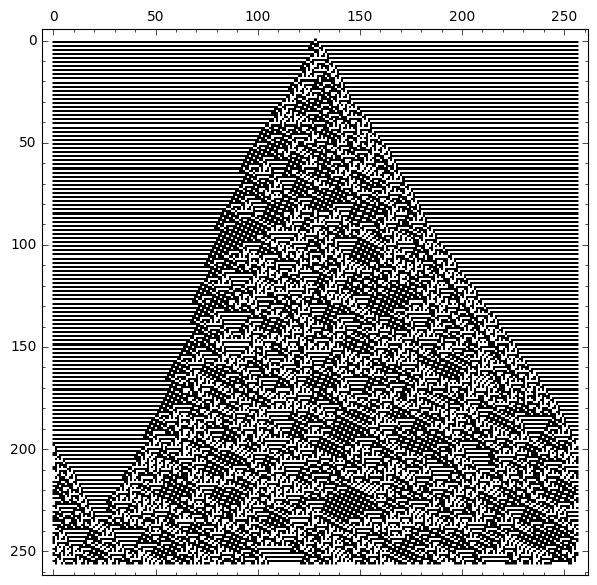

In [18]:
matrix_plot(matrix(ZZ,evolucion([0]*128+[1]+[0]*128,ZZ(randint(0,2**32-1)),256)))